In [ ]:
import _pickle as pkl
import pandas as pd
import numpy as np
# pkl.dump(dev_L_S,open("dev_L_S.p","wb"))
# pkl.dump(train_L_S,open("train_L_S.p","wb"))
#pkl.dump(test_L_S,open("test_L_S.p","wb"))

# val_L_S = pkl.load( open( "val_L_S.p", "rb" ) )
# train_L_S = pkl.load( open( "train_L_S.p", "rb" ) )
# test_L_S = pkl.load( open( "test_L_S.p", "rb" ) )

# train_L_S = pkl.load( open( "train_L_S_Embeddings.p", "rb" ) )
# test_L_S = pkl.load( open( "test_L_S_Embeddings.p", "rb" )) 

# train_L_S = pkl.load( open( "train_L_S_TFIDF.p", "rb" ) )
# test_L_S = pkl.load( open( "test_L_S_TFIDF.p", "rb" )) 


# train_L_S = pkl.load( open( "train_L_S_Keywords.p", "rb" ) )
# test_L_S = pkl.load( open( "test_L_S_Keywords.p", "rb" )) 

# train_L_S = pkl.load( open( "train_L_S_Keywords_regex.p", "rb" ) )
# test_L_S = pkl.load( open( "test_L_S_Keywords_regex.p", "rb" )) 

# train_L_S = pkl.load( open( "train_L_S_regex.p", "rb" ) )
# test_L_S = pkl.load( open( "test_L_S_regex.p", "rb" )) 

train_L_S = pkl.load( open( "train_L_S_Keywords_regex_extracts.p", "rb" ) )
test_L_S = pkl.load( open( "test_L_S_Keywords_regex_extracts.p", "rb" )) 


# LF_output_map = pkl.load(open("LF_output_map.p","rb"))
# LF_Names = pkl.load(open("LF_Names.p","rb"))
# LF_l = pkl.load(open("LF_l.p","rb"))

# LF_output_map = pkl.load(open("LF_output_map_84.p","rb"))
# LF_Names = pkl.load(open("LF_Names_84.p","rb"))
# LF_l = pkl.load(open("LF_l_84.p","rb"))

LF_output_map = pkl.load(open("LF_output_map_161.p","rb"))
LF_Names = pkl.load(open("LF_Names_161.p","rb"))
LF_l = pkl.load(open("LF_l_161.p","rb"))


class_names = pkl.load(open("class_names.p","rb"))
# print(LF_Names,len(LF_Names))
# print(LF_output_map)
# print(class_names)
train_L_S_df = pd.DataFrame((np.array(train_L_S)[:,0,:]),columns=LF_Names) 
print(train_L_S_df.shape)

# train_df=pd.read_csv('./complaints_train_data_clean.csv',usecols=["category_name","complaint_title","complaint_description",],na_filter=False)

train_df=pd.read_csv('./complaints_train_validation_data_clean.csv',usecols=["index","category_name","complaint_title","complaint_description",],na_filter=False)

train_df['category_name'] = train_df["category_name"].astype('category')
train_df['true_label'] = train_df['category_name'].cat.codes

train_L_S = np.array(train_L_S,dtype=np.float64)
test_L_S = np.array(test_L_S,dtype=np.float64)
dev_L_S = test_L_S
NoOfClasses = len(class_names) 
NoOfLFs = len(LF_Names) 

print(NoOfClasses,NoOfLFs)

In [11]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow as tf

In [201]:
def merge(a,b):
    c = []
    for i in range(len(a)):
        ci = []
        ci_l = a[i,0,:].tolist()+b[i,0,:].tolist()
        ci_s = a[i,1,:].tolist()+b[i,1,:].tolist()
        ci.append(ci_l)
        ci.append(ci_s)
        c.append(ci)
    return c
train_L_S_E = pkl.load( open( "train_L_S_T-D_Embeddings.p", "rb" ) )
test_L_S_E = pkl.load( open( "test_L_S_T-D_Embeddings.p", "rb" )) 

# train_L_S_K = pkl.load( open( "train_L_S_Regex.p", "rb" ) )
# test_L_S_K = pkl.load( open( "test_L_S_Regex.p", "rb" )) 

# train_L_S_K = pkl.load( open( "train_L_S_Keywords_regex.p", "rb" ) )
# test_L_S_K = pkl.load( open( "test_L_S_Keywords_regex.p", "rb" )) 

train_L_S_K = pkl.load( open( "train_L_S_Keywords_regex_extracts.p", "rb" ) )
test_L_S_K = pkl.load( open( "test_L_S_Keywords_regex_extracts.p", "rb" )) 


train_L_S = merge(np.array(train_L_S_K),np.array(train_L_S_E))
test_L_S = merge(np.array(test_L_S_K),np.array(test_L_S_E))
print(np.array(train_L_S).shape)
print(np.array(test_L_S).shape)

# LF_output_map = pkl.load(open("LF_output_map_84.p","rb"))
# LF_Names = pkl.load(open("LF_Names_84.p","rb"))
# LF_l = pkl.load(open("LF_l_84.p","rb"))

LF_output_map = pkl.load(open("LF_output_map_245.p","rb"))
LF_Names = pkl.load(open("LF_Names_245.p","rb"))
LF_l = pkl.load(open("LF_l_245.p","rb"))

class_names = pkl.load(open("class_names.p","rb"))
train_L_S_df = pd.DataFrame((np.array(train_L_S)[:,0,:]),columns=LF_Names) 

NoOfLFs = len(LF_Names) 
NoOfClasses = len(class_names) 

train_L_S = np.array(train_L_S,dtype=np.float64)
test_L_S = np.array(test_L_S,dtype=np.float64)
dev_L_S = test_L_S

print(NoOfClasses,NoOfLFs,len(LF_l))

(37595, 2, 245)
(6667, 2, 245)
42 245 245


In [41]:
#load true test labels

test_df=pd.read_csv('./complaints_test_data_clean.csv',usecols=["category_name","complaint_title","complaint_description",],na_filter=False)

colsize = len(test_df['category_name'])

test_df['category_name'] = test_df["category_name"].astype('category')
test_df['true_label'] = test_df['category_name'].cat.codes

true_labels = test_df['true_label'].tolist()
gold_labels_dev = true_labels

In [99]:
#majority vote #84 # Regex
# train_L_S_df.mode(axis=1)[0].tolist()
import math
# test_L_S_df.mode(axis=1)[0].tolist()
test_L_S_df = pd.DataFrame((np.array(test_L_S)[:,0,:]),columns=LF_Names)
# test_L_S_df = test_L_S_df.astype(int)
test_L_S_df = test_L_S_df.replace(-1, np.NaN)

predicted_labels=test_L_S_df.mode(axis=1)[0].tolist()
# print(predicted_labels)
predicted_labels = [ int(x) if not math.isnan(x) else 28 for x in predicted_labels ]
Results = predictAndPrint(predicted_labels)
Results

acc 0.4976751162441878


/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.48,0.39,0.62,26.0
Cattle,0.64,0.47,1.00,9.0
Diseases,0.03,0.05,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.29,0.95,0.17,121.0
No Sewage Drains,0.16,0.15,0.16,100.0
Others,0.13,0.08,0.32,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [119]:
#majority vote #245 
# train_L_S_df.mode(axis=1)[0].tolist()
import math
# test_L_S_df.mode(axis=1)[0].tolist()
test_L_S_df = pd.DataFrame((np.array(test_L_S)[:,0,:]),columns=LF_Names)
# test_L_S_df = test_L_S_df.astype(int)
test_L_S_df = test_L_S_df.replace(-1, np.NaN)

predicted_labels=test_L_S_df.mode(axis=1)[0].tolist()
# print(predicted_labels)
predicted_labels = [ int(x) if not math.isnan(x) else 28 for x in predicted_labels ]
Results = predictAndPrint(predicted_labels)
Results

acc 0.5722213889305535


/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.49,0.45,0.54,26.0
Cattle,0.67,0.67,0.67,9.0
Diseases,0.14,0.17,0.12,49.0
Government Land Encroachment,0.00,0.00,0.00,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.12,0.25,0.08,13.0
New Bus Shelters,0.35,0.93,0.21,121.0
No Sewage Drains,0.19,0.22,0.17,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [34]:
#  load 500 gold labels
# gold_df=pd.read_csv('./clean-gold-labels.tsv',sep='\t',usecols=["category_name","complaint_description",],na_filter=False)

# colsize = len(test_df['category_name'])

# gold_df['category_name'] = test_df["category_name"].astype('category')
# gold_df['true_label'] = test_df['category_name'].cat.codes

# true_labels = test_df['true_label'].tolist()
                    
# test_L_S = pkl.load( open( "gold-labels-clean.p", "rb" )) 
# print(np.array(test_L_S).shape)
# for i,x in enumerate(gold_df.groupby("category_name").agg({"complaint_description": np.count_nonzero}).index._data):
#     print(i,x)

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def draw2DArray(a):
    fig = plt.figure(figsize=(6, 3.2))
    ax = fig.add_subplot(111)
    ax.set_title('colorMap')
    plt.imshow(np.array(a))
    ax.set_aspect('equal')
    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()
    
      
def report2dict(cr):
    # Parse rows
    tmp = list()
    for row in cr.split("\n"):
        parsed_row = [x for x in row.split("  ") if len(x) > 0]
        if len(parsed_row) > 0:
            tmp.append(parsed_row)
    
    # Store in dictionary
    measures = tmp[0]

    D_class_data = defaultdict(dict)
    for row in tmp[1:]:
        class_label = row[0]
        for j, m in enumerate(measures):
            D_class_data[class_label][m.strip()] = float(row[j + 1].strip())
    return pd.DataFrame(D_class_data).T

def predictAndPrint(pl):
    print("acc",accuracy_score(true_labels,pl))
#     print(precision_recall_fscore_support(true_labels,pl,average='macro'))
#     draw2DArray(confusion_matrix(true_labels,pl))
    return report2dict(classification_report(true_labels, pl, target_names=class_names))
    
  

In [12]:
# Regex 84 normalized init thetas with 1
predicted_labels=train_nl_p(0.01,1,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("add:0", shape=(), dtype=floa

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[0.04632226 0.0566357  0.05607963 0.05343705 0.01193221 0.05

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.46,0.50,0.42,26.0
Cattle,0.57,0.50,0.67,9.0
Diseases,0.03,0.05,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.34,0.21,1.00,11.0
Manholes,0.26,0.18,0.46,13.0
New Bus Shelters,0.35,0.93,0.21,121.0
No Sewage Drains,0.26,0.18,0.42,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [15]:
# Regex 84 Unnormalized init thetas with 0
predicted_labels=train_nl_p(0.01,5,tf.truncated_normal_initializer(0,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("add:0", shape=(), dtype=floa

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 2190228.7368959896
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[0.0057416  0.03749519 0.05410872 

[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[0.00486631 0.00056882 0.05252698 0.05582092 0.00143153 0.05

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.47,0.45,0.50,26.0
Cattle,0.63,0.60,0.67,9.0
Diseases,0.04,0.33,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.29,0.91,0.17,121.0
No Sewage Drains,0.16,0.16,0.16,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [16]:
# Regex 84 Unnormalized
predicted_labels=train_nl_p2(0.01,5,tf.truncated_normal_initializer(0,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("sub_1:0", shape=(), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 2190232.5158982184
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 0.00844895  0.02347573  0.041745

[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 0.00183304  0.02507815  0.00693009  0.0227393   0.00909143

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.30,0.26,0.35,26.0
Cattle,0.50,0.57,0.44,9.0
Diseases,0.04,0.50,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.26,0.20,0.38,13.0
New Bus Shelters,0.39,0.91,0.25,121.0
No Sewage Drains,0.25,0.18,0.39,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.05,0.33,0.02,41.0


In [21]:
# Regex 84 Unnormalized
predicted_labels=train_nl_p2(0.01,5,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("sub_1:0", shape=(), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 2190232.46294954
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 0.01041706  0.01230686  0.04025352

[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 7.85066099e-03  5.04829936e-02  8.94786874e-03  5.65953072

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.36,0.28,0.50,26.0
Cattle,0.53,0.50,0.56,9.0
Diseases,0.04,0.17,0.02,49.0
Government Land Encroachment,0.00,0.00,0.00,8.0
Lakes - Others,0.22,0.13,0.82,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.17,1.00,0.09,121.0
No Sewage Drains,0.05,0.21,0.03,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.05,0.50,0.02,41.0


In [25]:
# Regex 84 normalized
predicted_labels=train_nl_p3(0.1/len(train_L_S),5,tf.truncated_normal_initializer(1,0.5,12),0)
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("add_1:0", shape=(), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 3111816.3549154084
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[1.78044204 0.27078579 1.2473165  

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.42,0.67,0.31,26.0
Cattle,0.56,0.56,0.56,9.0
Diseases,0.04,1.00,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.30,0.22,0.46,13.0
New Bus Shelters,0.33,0.96,0.20,121.0
No Sewage Drains,0.21,0.14,0.38,100.0
Others,0.01,0.09,0.01,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [28]:
# Regex 84 normalized
predicted_labels=train_nl_p3(0.1/len(train_L_S),5,tf.truncated_normal_initializer(0,0.5,12),3)
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("add_1:0", shape=(), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 2337013.703585489
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 0.66012657 -0.72941757  0.2467896

[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 0.74846605 -0.43021644  0.54335141  0.49564995  0.71762053

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.42,0.53,0.35,26.0
Cattle,0.74,0.70,0.78,9.0
Diseases,0.04,0.50,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.28,0.20,0.46,13.0
New Bus Shelters,0.33,0.92,0.20,121.0
No Sewage Drains,0.22,0.14,0.42,100.0
Others,0.03,0.15,0.02,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [30]:
# Regex 84 normalized
predicted_labels=train_nl_p3(0.1/len(train_L_S),5,tf.truncated_normal_initializer(1,0.5,12),3)
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("add_1:0", shape=(), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 2292951.2104920726
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[1.46906014 0.26967404 1.10000679 

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.43,0.73,0.31,26.0
Cattle,0.56,0.56,0.56,9.0
Diseases,0.04,1.00,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.31,0.96,0.18,121.0
No Sewage Drains,0.20,0.14,0.38,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [34]:
predicted_labels=train_unl_p(0.1/len(train_L_S),5,tf.truncated_normal_initializer(0,0.5,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("add:0", shape=(), dtype=floa

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 187646.61726042177
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 6.07670119e-01 -7.28927393e-01  

[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 6.37418250e-01 -4.28927442e-01  6.09737772e-02  2.35856725

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.43,0.73,0.31,26.0
Cattle,0.17,0.33,0.11,9.0
Diseases,0.04,0.50,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.33,0.96,0.20,121.0
No Sewage Drains,0.21,0.14,0.41,100.0
Others,0.03,0.29,0.02,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [37]:
predicted_labels=train_unl_p2(0.1/len(train_L_S),5,tf.truncated_normal_initializer(0,0.5,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("sub:0", shape=(), dtype=floa

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss -110938.28189099864
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 0.60767098 -0.77837933  0.05303

[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 0.63742161 -0.6411971   0.06097417  0.02358564  0.60986901

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.43,0.73,0.31,26.0
Cattle,0.20,1.00,0.11,9.0
Diseases,0.00,0.00,0.00,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.33,0.92,0.20,121.0
No Sewage Drains,0.21,0.14,0.43,100.0
Others,0.03,0.18,0.02,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [122]:
# normalized loss
#snorkel thetas
getNLObjValue(np.array([[1.76391407, 1.77304495, 1.7848715 , 1.77938939, 1.78129927,
       1.76980842, 1.77524435, 1.75907887, 1.77375708, 1.7745302 ,
       1.76926712, 1.79177162, 1.78721798, 1.78094109, 1.88356196,
       1.76914226, 1.7772291 , 1.76108504, 1.7722165 , 1.75878418,
       1.76976999, 1.76887736, 1.77399554, 1.76549331, 1.78808644,
       1.77207588, 1.78528475, 1.77355378, 1.7500354 , 1.77137777,
       1.75345954, 1.76596083, 1.81794025, 1.76172259, 1.76714155,
       1.77776216, 1.84133602, 1.79961557, 1.79040711, 1.77337357,
       1.77285101, 1.76600442, 1.74862096, 1.75324132, 1.76868399,
       1.75619019, 1.77383857, 1.74421596, 1.76685781, 1.7788041 ,
       1.68889425, 1.76130573, 1.75325194, 1.78268162, 1.75035281,
       1.7741238 , 1.85280534, 1.78029708, 1.77180978, 1.76533835,
       1.7162663 , 1.75608436, 1.77917854, 1.76001671, 1.74394764,
       1.75558926, 1.77838364, 1.78734113, 1.75061305, 1.77093851,
       1.7628243 , 1.75981107, 1.75929945, 1.70822246, 1.7956218 ,
       1.76581912, 1.76846226, 1.72687966, 1.84166082, 1.69852702,
       1.74311663, 1.76398722, 1.77343838, 1.76645124]],dtype=np.float64))

#un - normalized thetas
getNLObjValue(np.array([[ 18.84367959,  16.68559127 ,  3.47389212,  12.58135513 , 58.43837294,
   41.65605038,   1.65219405,   4.26730559,  35.6600036 ,  17.4124519,
    1.72411592,  43.39461707,   1.20798085,  45.34487309, 160.50801225,
    1.31633195,   4.33201544,   1.26911141,  81.46029448,  17.23817027,
    1.52528827,   3.72147   ,  17.59690387,   6.56365554,  14.61817143,
   14.01552678,   9.43570082,  13.87919237,   1.23813494,   0.9904197,
    2.69047878,  48.80629648, 106.84303298,   6.24569385,   1.36023706,
   99.00525515, 109.53967877,  85.95334272,  87.2356383 ,   1.01718104,
    1.4060572 ,   1.26619085,  25.64594525,  21.19919578,  10.04361013,
   36.36772779,  49.83270661,  45.93388084,   1.35631621,   4.7980585,
   55.61656659,  20.02019163,   3.96499825,  46.01141721,   1.99743666,
   45.09880116, 171.03446645,   1.58083843,   6.49951049,   1.14166041,
   93.19246947,  20.19525007,   1.15296884,   3.86769122,  19.94691518,
   11.79681019,  16.91783888,  15.03898309,  12.82768983,  17.59823181,
    6.67193969,   1.55873224,   3.51349661,  57.79787003, 118.76076051,
    8.08493206,   1.40468649, 114.96881735, 109.91356637, 145.29275851,
   93.9090951 ,   0.9425593 ,   1.1363148 ,   1.54521374]],dtype=np.float64))

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas Tensor("Const:0", shape=(1, 84), dtype=float64)
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("Neg:0", shape=(), dtype=float64)
ma

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0 loss 8171012.24597436
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.2324581  0.21384075
 0.32596594 0.23165596 0.34775589 0.1425593  0.10759231 0.27399862]
[[ 18.84367959  16.68559127   3.47389

In [123]:
# Un-normalized loss
#snorkel thetas
getUNLObjValue(np.array([[1.76391407, 1.77304495, 1.7848715 , 1.77938939, 1.78129927,
       1.76980842, 1.77524435, 1.75907887, 1.77375708, 1.7745302 ,
       1.76926712, 1.79177162, 1.78721798, 1.78094109, 1.88356196,
       1.76914226, 1.7772291 , 1.76108504, 1.7722165 , 1.75878418,
       1.76976999, 1.76887736, 1.77399554, 1.76549331, 1.78808644,
       1.77207588, 1.78528475, 1.77355378, 1.7500354 , 1.77137777,
       1.75345954, 1.76596083, 1.81794025, 1.76172259, 1.76714155,
       1.77776216, 1.84133602, 1.79961557, 1.79040711, 1.77337357,
       1.77285101, 1.76600442, 1.74862096, 1.75324132, 1.76868399,
       1.75619019, 1.77383857, 1.74421596, 1.76685781, 1.7788041 ,
       1.68889425, 1.76130573, 1.75325194, 1.78268162, 1.75035281,
       1.7741238 , 1.85280534, 1.78029708, 1.77180978, 1.76533835,
       1.7162663 , 1.75608436, 1.77917854, 1.76001671, 1.74394764,
       1.75558926, 1.77838364, 1.78734113, 1.75061305, 1.77093851,
       1.7628243 , 1.75981107, 1.75929945, 1.70822246, 1.7956218 ,
       1.76581912, 1.76846226, 1.72687966, 1.84166082, 1.69852702,
       1.74311663, 1.76398722, 1.77343838, 1.76645124]],dtype=np.float64))

#normalized thetas
getUNLObjValue(np.array([[1.03710943, 0.72891069, 0.91256307, 0.9065573 , 1.04359179, 0.99179506,
  1.07033153, 0.93697395, 1.09931246, 0.98664338, 0.88710382, 1.00020554,
  0.8844131 , 1.0257479 , 1.05320124, 0.94250273, 0.75971955, 0.82706024,
  1.02566678, 0.75808689, 0.93623337, 0.85304691, 0.91144645, 1.0890069,
  0.78471138, 1.08629106, 1.01363184, 0.98196969, 0.9578832 , 0.890922,
  0.75897035, 0.79083164, 0.94504572, 0.98910501, 0.90256731, 0.83399044,
  1.0526879 , 0.91296422, 0.87918072, 0.91735828, 0.99442894, 0.84282007,
  1.04270585, 0.80845978, 0.93485408, 1.01116604, 1.08801828, 1.05492529,
  0.9081924 , 0.84715166, 0.83377025, 0.83439804, 0.88535814, 1.1166286,
  1.10502333, 0.92236289, 1.01219273, 0.86888731, 0.95393976, 0.76423516,
  1.04786037, 0.80500049, 0.94208612, 0.99527191, 1.04370474, 1.11600129,
  0.9791124 , 0.95540789, 1.0464887 , 0.89115602, 0.93954564, 0.9246477,
  1.00317469, 0.91967407, 1.12446706, 0.84673924, 0.9362469 , 0.99849333,
  1.11282625, 1.02320935, 1.12996779, 0.84274034, 0.82023684, 0.99097614]],dtype=np.float64))

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas Tensor("Const:0", shape=(1, 84), dtype=float64)
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
nls Tensor("mul:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(), dtype=float64)
normloss Tensor("Neg:0", shape=(), dtype=float64)
ma

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


marginals Tensor("transpose_1:0", shape=(42, ?, 1), dtype=float64)
predict Tensor("ArgMax:0", shape=(?, 1), dtype=int64)
0 loss -146494.0264749541
[0.31754463 0.01421453 0.20955965 0.20062431 0.30637787 0.24133855
 0.369206   0.23120785 0.34633471 0.2647233  0.18357064 0.26661405
 0.18238184 0.27858159 0.24081247 0.24223612 0.05334134 0.11993454
 0.25962482 0.03641602 0.23537624 0.14143537 0.19621468 0.36301113
 0.07373343 0.37747756 0.26808572 0.26850778 0.25747627 0.19034372
 0.02199156 0.03837747 0.16215054 0.28407008 0.20081754 0.05785297
 0.26707259 0.14537297 0.1048543  0.21718104 0.28321176 0.12616597
 0.31429502 0.0863964  0.22745796 0.29568415 0.35099954 0.29810888
 0.20629042 0.13901088 0.05940858 0.10766452 0.17473813 0.38014276
 0.39700817 0.17087316 0.19603627 0.16858467 0.24490965 0.05639868
 0.26852239 0.07893876 0.24100708 0.28263506 0.31951938 0.38431001
 0.26592654 0.24531187 0.29454672 0.17417758 0.23602695 0.22370915
 0.26280696 0.1543867  0.33688209 0.13802535 0.23

In [125]:
def drawLossVsAcc(y_loss,x_f1s,text,title):
    fig, ax = plt.subplots()
    ax.scatter(x_f1s, y_loss)

    plt.xlabel('accuracy')
    plt.ylabel('loss')
    plt.title(title)
    
    for i, txt in enumerate(text):
        ax.annotate(txt, (x_f1s[i],y_loss[i]))
        
    plt.savefig(title+".png")

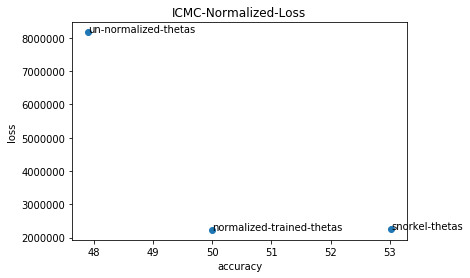

In [127]:
#normalized
y_loss=[2228793.20,2261096.51,8171012.24]
x_f1s =[50.0,53.02,47.9]
text=["normalized-trained-thetas","snorkel-thetas","un-normalized-thetas"]
drawLossVsAcc(y_loss,x_f1s,text,"ICMC-Normalized-Loss")

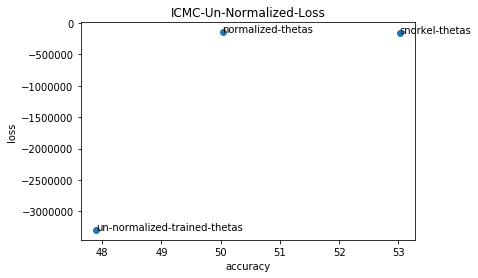

In [130]:
# un-normalized
y_loss=[-3297257.67,-161207.29,-146494.02]
x_f1s =[47.9,53.02,50.03]
text=["un-normalized-trained-thetas","snorkel-thetas","normalized-thetas"]
drawLossVsAcc(y_loss,x_f1s,text,"ICMC-Un-Normalized-Loss")

In [174]:
## normalized loss with prior from other LFs

def train_nlp(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        
        dev_dataset = tf.data.Dataset.from_tensor_slices(dev_L_S).batch(dev_L_S.shape[0])

        labels = tf.convert_to_tensor(gold_labels_dev)
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        
        
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)

#         ls_ = tf.multiply(l,s_)

#         nls_ = tf.multiply(l,s_)*-1
               
        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out
        
#         pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
        pout = tf.map_fn(lambda li: tf.map_fn(lambda lij:iskequalsy(li,lij),li ),l)
    
        pout1 = tf.map_fn(lambda li: tf.map_fn(lambda lij:li*lij,li ),l)
#         print("nls",nls_)
        print("pout",pout)
        print("pout",pout1)

    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)

        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        

        sumy = tf.reduce_sum(t_pout-logz,axis=1)
        print("sumy",sumy)
    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_sum(t_pout-logz,axis=1) ))

        
        def index_along_every_row(array, index):
            N, _ = array.shape
            return array[np.arange(N), index]

        #Best LF
        blf = tf.argmax(t_pout,axis=1)
        print("blf",blf)
        print("normloss",normloss)
        
        
        marginals = tf.py_func(index_along_every_row, [tf.squeeze(t_pout), tf.squeeze(blf)], [tf.float64])[0]

        print("marginals",marginals)
        predict = tf.gather(k,tf.squeeze(blf))
        
#         predict = tf.where(tf.equal(predict1,1),tf.ones_like(predict1),tf.zeros_like(predict1))
#         print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)


                sess.run(dev_init_op)
                a,t,m,pl,b = sess.run([alphas,thetas,marginals,predict,blf])
#                 print(a)
                print(t)

                print("blfs")
                unique, counts = np.unique(b.tolist(), return_counts=True)
                print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
#             print(a)
            print(t)

      
            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [169]:
predicted_labels=train_nlp(0.1/len(train_L_S),1,tf.truncated_normal_initializer(0.5,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/map/while/Select:0", shape=(84,), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 84), dtype=float64)
pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 84), dtype=float64)
t_pout Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_4/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_4/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
sumy Tensor("Sum_1:0", shape=(?, 1), dtype=float64)


/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0.71695764 0.41390037 0.6094706  0.60047932 0.70493399 0.63893253
  0.76912653 0.63106261 0.7439259  0.66408774 0.58345429 0.66580713
  0.5822561  0.67697633 0.6315839  0.64220062 0.45317115 0.51974666
  0.65623473 0.43578509 0.63529481 0.54113254 0.59588093 0.76216309
  0.47349433 0.77728975 0.66634893 0.66817578 0.65742528 0.59029349
  0.42087595 0.43651577 0.55774952 0.6838661  0.60073284 0.45412974
  0.66284004 0.54266374 0.50144254 0.61714821 0.68289992 0.52573039
  0.71220027 0.48526726 0.62689043 0.69450785 0.74944994 0.69413254
  0.60608869 0.53858949 0.45163817 0.50644167 0.57375096 0.77857055
  0.79606289 0.56849207 0.5846333  0.56854498 0.64442311 0.45615843
  0.6609578  0.47772196 0.64089463 0.68211704 0.71773054 0.78229414
  0.66535518 0.64501049 0.6912621  0.57341534 0.63562341 0.62360979
  0.66075384 0.54957194 0.73026445 0.53733654 0.63211874 0.60705056
  0.72091532 0.62156166 0.74112653 0.54252647 0.50717609 0.67341165]]
{0.0: 6597, 1.0: 69, 2.0: 1}
acc 0.00479976001

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.00,0.0,0.00,26.0
Cattle,0.00,0.0,0.00,9.0
Diseases,0.00,0.0,0.00,49.0
Government Land Encroachment,0.00,0.0,0.00,8.0
Lakes - Others,0.00,0.0,0.00,11.0
Manholes,0.00,0.0,0.00,13.0
New Bus Shelters,0.00,0.0,0.00,121.0
No Sewage Drains,0.00,0.0,0.00,100.0
Others,0.00,0.0,0.00,131.0
Overflow of Storm Water Drains,0.00,0.0,0.00,41.0


In [175]:
# print blf
predicted_labels=train_nlp(0.1/len(train_L_S),1,tf.truncated_normal_initializer(0.5,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/map/while/Select:0", shape=(84,), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 84), dtype=float64)
pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 84), dtype=float64)
t_pout Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_4/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_4/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
sumy Tensor("Sum_1:0", shape=(?, 1), dtype=float64)


/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0.71695764 0.41390037 0.6094706  0.60047932 0.70493399 0.63893253
  0.76912653 0.63106261 0.7439259  0.66408774 0.58345429 0.66580713
  0.5822561  0.67697633 0.6315839  0.64220062 0.45317115 0.51974666
  0.65623473 0.43578509 0.63529481 0.54113254 0.59588093 0.76216309
  0.47349433 0.77728975 0.66634893 0.66817578 0.65742528 0.59029349
  0.42087595 0.43651577 0.55774952 0.6838661  0.60073284 0.45412974
  0.66284004 0.54266374 0.50144254 0.61714821 0.68289992 0.52573039
  0.71220027 0.48526726 0.62689043 0.69450785 0.74944994 0.69413254
  0.60608869 0.53858949 0.45163817 0.50644167 0.57375096 0.77857055
  0.79606289 0.56849207 0.5846333  0.56854498 0.64442311 0.45615843
  0.6609578  0.47772196 0.64089463 0.68211704 0.71773054 0.78229414
  0.66535518 0.64501049 0.6912621  0.57341534 0.63562341 0.62360979
  0.66075384 0.54957194 0.73026445 0.53733654 0.63211874 0.60705056
  0.72091532 0.62156166 0.74112653 0.54252647 0.50717609 0.67341165]]
{0.0: 6597, 1.0: 69, 2.0: 1}
acc 0.00479976001

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.00,0.0,0.00,26.0
Cattle,0.00,0.0,0.00,9.0
Diseases,0.00,0.0,0.00,49.0
Government Land Encroachment,0.00,0.0,0.00,8.0
Lakes - Others,0.00,0.0,0.00,11.0
Manholes,0.00,0.0,0.00,13.0
New Bus Shelters,0.00,0.0,0.00,121.0
No Sewage Drains,0.00,0.0,0.00,100.0
Others,0.00,0.0,0.00,131.0
Overflow of Storm Water Drains,0.00,0.0,0.00,41.0


In [177]:
# print blf more iters
predicted_labels=train_nlp(0.1/len(train_L_S),3,tf.truncated_normal_initializer(0.5,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/map/while/Select:0", shape=(84,), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 84), dtype=float64)
pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 84), dtype=float64)
t_pout Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 84, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_4/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_4/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
sumy Tensor("Sum_1:0", shape=(?, 1), dtype=float64)


/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 33620470.99113672
[[0.81637365 0.51358119 0.70937934 0.70033089 0.80349691 0.73651258
  0.86904754 0.73091691 0.84153065 0.76344859 0.68333594 0.765012
  0.6821297  0.77537082 0.72235795 0.7421646  0.55299944 0.61955488
  0.75283391 0.53515073 0.73521586 0.64083329 0.69554543 0.86131387
  0.57325963 0.87709589 0.76461835 0.76784512 0.75737292 0.69024294
  0.51976027 0.53463732 0.65333422 0.78366427 0.7006479  0.55040747
  0.75862844 0.63995698 0.59801182 0.71711497 0.78258094 0.62529169
  0.8101115  0.58412715 0.72631925 0.79332589 0.84789204 0.79013535
  0.70588367 0.63816264 0.54386959 0.60521181 0.67275729 0.87700876
  0.89512448 0.666102   0.67322162 0.66850494 0.74393355 0.55591607
  0.75340507 0.57649854 0.74078098 0.78160108 0.81593875 0.8802714
  0.7647898  0.74470485 0.78795762 0.67265541 0.73520941 0.72350987
  0.75869445 0.64473307 0.82364321 0.63664991 0.73178029 0.70025011
  0.81588426 0.71145186 0.8344952  0.64249322 0.60675191 0.77282171]]
blfs
{0: 6597, 1: 69, 2:

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.00,0.0,0.00,26.0
Cattle,0.00,0.0,0.00,9.0
Diseases,0.00,0.0,0.00,49.0
Government Land Encroachment,0.00,0.0,0.00,8.0
Lakes - Others,0.00,0.0,0.00,11.0
Manholes,0.00,0.0,0.00,13.0
New Bus Shelters,0.00,0.0,0.00,121.0
No Sewage Drains,0.00,0.0,0.00,100.0
Others,0.00,0.0,0.00,131.0
Overflow of Storm Water Drains,0.00,0.0,0.00,41.0


In [176]:
#lf stats

#  title regex+ desc regex
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

lf_stats = dict()
# index = ['coverage','overlap','conflict','accuracy']
for col1 in train_L_S_df.iteritems(): #col1[0] is name , col1[1] is column data
    coverage = col1[1].tolist().count(LF_output_map[col1[0]])
    pl = col1[1].tolist() # contains -1 and LF_output_map[col1[0]]
    tl = [-1 if x!=LF_output_map[col1[0]] else x for x in train_df['true_label'] ]
    precision,recall,f1_score,_ =  precision_recall_fscore_support(tl,pl,average='binary',pos_label=LF_output_map[col1[0]])
    lf_stats[col1[0]] = pd.Series([coverage,precision,recall,f1_score],index=['coverage','precision','recall','f1_score'])

lf_stats_df = pd.DataFrame(lf_stats,index=['coverage','precision','recall','f1_score'],columns=LF_Names).T

lf_stats_df.to_csv("lf_stats.csv")
lf_stats_df

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,coverage,precision,recall,f1_score
LF_Title_Regex_AirPollution,414.0,0.164251,0.363636,0.226290
LF_Title_Regex_AutorickshawsandTaxis,220.0,0.331818,0.663636,0.442424
LF_Title_Regex_BMTCDriverorConductor,44.0,0.545455,0.143713,0.227488
LF_Title_Regex_BMTCNeednewBusRoute,87.0,0.712644,0.196825,0.308458
LF_Title_Regex_BMTCOthers,1046.0,0.389101,0.492736,0.434829
LF_Title_Regex_BadRoads,1779.0,0.682406,0.224399,0.337738
LF_Title_Regex_BrokenStormWaterDrains,34.0,0.264706,0.065693,0.105263
LF_Title_Regex_Cattle,86.0,0.558140,0.786885,0.653061
LF_Title_Regex_ClearingofBlockageofUnderGroundDrainagePipelinesandReplacementofDamagedorMissingManholeCover,1777.0,0.092290,0.384075,0.148820
LF_Title_Regex_DesiltingLakes,462.0,0.188312,0.925532,0.312950


In [145]:
#input L_S:train_L_S, K: no of classes

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def get_maj_prior(L_S,K):
    maj_prior = []
    
    print(L_S[:,0,:].shape)
    for row in np.nditer(L_S[:,0,:],flags=['external_loop'], order='C'):
        p = np.ones(K)/K
        unique, counts = np.unique(row, return_counts=True)
        unique = [int(x) for x in unique]
        rc = dict(zip(unique, counts))
        tnz = np.count_nonzero(row)
        if -1 in rc:
            p[0] = rc[-1]
        if 1 in rc:
            p[1] = rc[1]
        p = softmax(p)
        maj_prior.append(p)
    return np.array(maj_prior)

dev_maj_pl=get_maj_prior(dev_L_S,2)
print(dev_maj_pl.shape)


train_maj_pl=get_maj_prior(train_L_S,2)
print(train_maj_pl.shape)

(6667, 84)
(6667, 2)
(37595, 84)
(37595, 2)


In [200]:
## smooth lfs training with discrete lf normalizer

def train_dnl_s(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.1,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s,name = "s_")
        print("s_",s_)

       
    
        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           -tf.ones_like(v))
            print("out",out)
            return out

#         ls_ = tf.multiply(l,s_)

#         nls_ = tf.multiply(l,s_)*-1

#         pout = tf.map_fn(lambda c: iskequalsy(l,c)*s_ ,np.array([-1,1],dtype=np.float64),name="pout")
        
        pout = tf.map_fn(lambda c: iskequalsy(l,c)*s_ ,np.arange(NoOfClasses,dtype=np.float64),name="pout")

#         print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout,name="t_pout")
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        def ints(y):
            ky = iskequalsy(k,y)
            print("ky",ky)
            out1 = alphas+((tf.exp((t*ky*(1-alphas)))-1)/(t*ky))
            print("intsy",out1)
            return out1
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),\
                       np.arange(NoOfClasses,dtype=np.float64))

#         zy = tf.map_fn(lambda y: tf.reduce_prod(1+ints(y),axis=0),\
#                    np.array([-1,1],dtype=np.float64),name="zy")
    
#         zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),\
#                        np.array([-1,1],dtype=np.float64))

       

    
        print("zy",zy)
#         zy = tf.map_fn(lambda y: tf.reduce_prod(1+ints(y),axis=0),\
#                        np.array(NoOfClasses,dtype=np.float64))
        
        logz = tf.log(tf.reduce_sum(zy,axis=0),name="logz")
        
        print("logz",logz)
        tf.summary.scalar('logz', logz)
        lsp = tf.reduce_logsumexp(t_pout,axis=0)
        print("lsp",lsp)
        tf.summary.scalar('lsp', tf.reduce_sum(lsp))

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(lsp  - logz  ))


        tf.summary.scalar('un-normloss', normloss)
#         tf.summary.histogram('thetas', t)
#         tf.summary.histogram('alphas', alphas)
        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        summary_merged = tf.summary.merge_all()
        train_writer = tf.summary.FileWriter('./summary/train',
                                      tf.get_default_graph())
        test_writer = tf.summary.FileWriter('./summary/test')

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for en in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    it = 0
                    while True:
                        sm,_,ls,t = sess.run([summary_merged,train_step,normloss,thetas])
#                         print(t)
#                         print(tl)
                        train_writer.add_summary(sm, it)
#                         if(ls<1e-5):
#                             break
                        tl = tl + ls
                        it = it + 1
                        
                except tf.errors.OutOfRangeError:
                    pass
                print(en,"loss",tl)

                sess.run(dev_init_op)
                sm,a,t,m,pl = sess.run([summary_merged,alphas,thetas,marginals,predict])
                test_writer.add_summary(sm, en)
#                 print(a)
#                 print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
#             print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="binary"))

            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [202]:
predicted_labels=train_dnl_s(0.01/len(train_L_S),5,tf.truncated_normal_initializer(1,0.1,12)) 
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 245), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 245) dtype=float64_ref>
k Tensor("Const:0", shape=(245,), dtype=float64)
<tf.Variable 'alphas:0' shape=(245,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 245), dtype=float64)
l Tensor("unstack:0", shape=(?, 245), dtype=float64)
s_ Tensor("s_/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 245), dtype=float64)
out Tensor("pout/while/Select:0", shape=(?, 245), dtype=float64)
pout Tensor("pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 245), dtype=float64)
t_pout Tensor("t_pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(245,), dtype=float64)
out Tensor("map/while/Select:0", shape=(245,), dtype=float64)
zy Tensor("map/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("logz:0", shape=(), dtype=float64)
lsp Tensor("ReduceLogSumExp/add:0", shape=(?, 1), dtype=float64)

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.3954740022686744, 0.42213635515753656, 0.34835396365023497, None)

1 loss 6932515.2447858965
acc 0.5885705714714264
(0.4011913428540712, 0.41221078854568627, 0.33892072039765575, None)

2 loss 6833671.754569368
acc 0.5888705564721763
(0.3969708404411718, 0.40245487504400496, 0.3337034798881872, None)

3 loss 6736401.33716474
acc 0.5890205489725514
(0.3969042014013449, 0.4013212426711706, 0.3331401171287809, None)

4 loss 6640671.569576921
acc 0.5888705564721763
(0.39521059406797865, 0.39573095007232545, 0.32966965410000065, None)

[ 0.26747573 -0.03606854  0.15944245  0.15001675  0.25508834  0.18663693
  0.3191791   0.18112498  0.29561104  0.21465258  0.1334953   0.21520427
  0.1322804   0.22619842  0.17378167  0.19219844  0.00324688  0.06985034
  0.20944181 -0.01387091  0.18529405  0.09130812  0.14579293  0.31241546
  0.02351453  0.32716467  0.2177902   0.21809517  0.20746368  0.14031916
 -0.02878015 -0.01222392  0.1061199   0.23396535  0.15046487  0.00543807
  0.20913981  0.087143

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.34,0.29,0.42,26.0
Cattle,0.50,0.57,0.44,9.0
Diseases,0.10,0.30,0.06,49.0
Government Land Encroachment,0.07,0.05,0.12,8.0
Lakes - Others,0.26,0.16,0.64,11.0
Manholes,0.08,0.08,0.08,13.0
New Bus Shelters,0.38,0.91,0.24,121.0
No Sewage Drains,0.15,0.41,0.09,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [158]:
## Normalized loss with majority bias

def train_nlmp(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(dev_L_S).batch(dev_L_S.shape[0])
        
        maj_train_dataset = tf.data.Dataset.from_tensor_slices(train_maj_pl).batch(BATCH_SIZE)
        maj_dev_dataset = tf.data.Dataset.from_tensor_slices(dev_maj_pl).batch(dev_maj_pl.shape[0])

        labels = tf.convert_to_tensor(gold_labels_dev)
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        
        maj_iterator = tf.data.Iterator.from_structure(maj_train_dataset.output_types,
                                               maj_train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        maj_train_init_op = maj_iterator.make_initializer(maj_train_dataset)
       
        dev_init_op = iterator.make_initializer(dev_dataset)
        maj_dev_init_op = maj_iterator.make_initializer(maj_dev_dataset)

        next_element = iterator.get_next()
        maj_prior = tf.transpose(maj_iterator.get_next())
        print("maj_label",maj_prior)
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)



        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
#
      


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)

        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)
       
     

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_sum(maj_prior*tf.squeeze(t_pout-logz),axis=1) ))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                sess.run(maj_train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                sess.run(maj_dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
#                 print(a)
                print(t)


                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)


#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
#             print(a)
            print(t)

      
            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [159]:
predicted_labels=train_nlmp(0.1/len(train_L_S),5,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

maj_label Tensor("transpose:0", shape=(2, ?), dtype=float64)
next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
normloss Tensor("Neg:0", shape=(), dtype=float64)
marginals Tensor("transpose_2:0", shape=(42

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 99420431.49828991
[[0.91928612 0.61645373 0.80996038 0.8012188  0.91041771 0.84951745
  0.96951163 0.83186325 0.95542836 0.86747789 0.78412074 0.86899671
  0.7828721  0.88470137 0.87597436 0.8424125  0.65426303 0.7210704
  0.87108975 0.64081257 0.8357208  0.74276139 0.79748244 0.96509826
  0.67492953 0.97809383 0.8737663  0.86982552 0.85771216 0.79058726
  0.62820484 0.64993731 0.77856292 0.88489152 0.80119799 0.67799866
  0.88013561 0.75734152 0.71893929 0.8173439  0.88454354 0.72815187
  0.92027957 0.69413043 0.82974792 0.89983287 0.9552464  0.91112837
  0.80703425 0.74098313 0.69385514 0.71341902 0.7792701  0.98441521
  0.99981947 0.7804978  0.84054856 0.76878646 0.84723545 0.6579035
  0.89374953 0.68716764 0.84147589 0.88469681 0.9255526  0.98903846
  0.86845121 0.84630984 0.90506585 0.7772996  0.83756556 0.82415008
  0.87263342 0.78175044 0.95910273 0.74097308 0.83383658 0.84707682
  0.94101662 0.87379588 0.97130982 0.74273011 0.7095455  0.87642798]]
[0.31754463 0.01421453 

4 loss 98835256.38160703
[[0.6223921  0.32035437 0.51067782 0.50228755 0.61762859 0.56371512
  0.67005415 0.53302603 0.67027704 0.57229348 0.48509985 0.57326443
  0.48375467 0.59529228 0.62966584 0.54272555 0.35591192 0.42307126
  0.59036352 0.34839947 0.53633064 0.44513378 0.49975224 0.66885719
  0.37706465 0.6792055  0.58370629 0.57215937 0.55813322 0.49102015
  0.3390413  0.36906631 0.50607621 0.58634207 0.5018765  0.41046246
  0.60244551 0.47682106 0.44266719 0.51763296 0.58690663 0.43170791
  0.63092872 0.40737398 0.53383368 0.60718973 0.66282049 0.63349189
  0.50838463 0.44451193 0.45011426 0.4235936  0.48727904 0.69199369
  0.70479702 0.49727546 0.60822592 0.46914418 0.55131455 0.36056509
  0.63551549 0.40121598 0.54231544 0.58834014 0.63617526 0.69753573
  0.57287064 0.54812196 0.62339224 0.48287047 0.54033964 0.52493624
  0.58929086 0.52571685 0.69555298 0.44624646 0.5362936  0.59921624
  0.66654409 0.63987127 0.709723   0.44303249 0.41306082 0.58071286]]
[0.31754463 0.0142145

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.43,0.73,0.31,26.0
Cattle,0.59,0.62,0.56,9.0
Diseases,0.04,1.00,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.33,0.96,0.20,121.0
No Sewage Drains,0.22,0.16,0.38,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [161]:
## Normalized loss with majority bias nu- normalized

def train_unlmp(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(dev_L_S).batch(dev_L_S.shape[0])
        
        maj_train_dataset = tf.data.Dataset.from_tensor_slices(train_maj_pl).batch(BATCH_SIZE)
        maj_dev_dataset = tf.data.Dataset.from_tensor_slices(dev_maj_pl).batch(dev_maj_pl.shape[0])

        labels = tf.convert_to_tensor(gold_labels_dev)
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        
        maj_iterator = tf.data.Iterator.from_structure(maj_train_dataset.output_types,
                                               maj_train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        maj_train_init_op = maj_iterator.make_initializer(maj_train_dataset)
       
        dev_init_op = iterator.make_initializer(dev_dataset)
        maj_dev_init_op = maj_iterator.make_initializer(maj_dev_dataset)

        next_element = iterator.get_next()
        maj_prior = tf.transpose(maj_iterator.get_next())
        print("maj_label",maj_prior)
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)



        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
#
      


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)

        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)
       
     

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_sum(maj_prior*tf.squeeze(t_pout),axis=1) ))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                sess.run(maj_train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                sess.run(maj_dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
#                 print(a)
                print(t)


                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)


#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
#             print(a)
            print(t)

      
            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [162]:
predicted_labels=train_unlmp(0.1/len(train_L_S),5,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

maj_label Tensor("transpose:0", shape=(2, ?), dtype=float64)
next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
normloss Tensor("Neg:0", shape=(), dtype=float64)
marginals Tensor("transpose_2:0", shape=(42

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss -118172.97466153975
[[1.13800034 0.82859192 1.01478842 1.00888229 1.1394103  1.0845323
  1.17362778 1.03956808 1.18960798 1.08634662 0.9905131  1.09096398
  0.9896921  1.11379184 1.12511826 1.04256156 0.86275752 0.93017205
  1.11101024 0.85803934 1.03980047 0.9552937  1.01106988 1.18804333
  0.88567907 1.18769962 1.1047176  1.08330277 1.05943579 0.9923598
  0.85122513 0.8766736  1.02082066 1.09469012 1.00559942 0.91202519
  1.12447132 0.99145045 0.95663537 1.01718104 1.09747613 0.94354558
  1.1541977  0.91572317 1.04745645 1.12535791 1.18535164 1.1535201
  1.01678956 0.95601958 0.93648693 0.93822726 1.0018982  1.21465165
  1.22331332 1.01386173 1.08913469 0.96942614 1.06328589 0.86852258
  1.14444978 0.90950151 1.04751524 1.10171829 1.15641609 1.22348849
  1.0860761  1.05927452 1.14502985 0.99777167 1.05258002 1.02960113
  1.10271497 1.01563172 1.2082458  0.96032765 1.04723218 1.08634028
  1.18850745 1.11901552 1.21912153 0.9425593  0.92455259 1.09448748]]
[0.31754463 0.01421453

4 loss -127927.84583611398
[[1.16866589 0.85027276 1.0227215  1.02138017 1.18890387 1.14941188
  1.18027188 1.05215281 1.2544248  1.11882673 1.00100332 1.1273867
  1.00070252 1.16661184 1.25155219 1.04306569 0.87695363 0.94563635
  1.1881465  0.89051946 1.04643039 0.97604682 1.03340925 1.22561581
  0.90355771 1.2031671  1.15961624 1.10549869 1.06243777 0.995386
  0.89508786 0.93424166 1.10888115 1.11061175 1.01278868 0.99326973
  1.21046222 1.06055311 1.03441561 1.01718104 1.11905135 0.96969327
  1.21400161 0.95981527 1.07751577 1.1699333  1.23694179 1.23671867
  1.03263296 0.98166154 1.05208957 0.98413084 1.04272962 1.26633124
  1.26271417 1.07841445 1.22879188 0.97069077 1.0909253  0.88677714
  1.25828505 0.95540508 1.05732916 1.13033125 1.21179139 1.28230169
  1.11623887 1.08026582 1.22086005 1.03314866 1.07758816 1.03847692
  1.16263134 1.10760329 1.31528863 0.99377133 1.06940152 1.19511594
  1.2822199  1.25008809 1.32617255 0.9425593  0.95016658 1.12528743]]
[0.31754463 0.01421453

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.34,0.67,0.23,26.0
Cattle,0.59,0.62,0.56,9.0
Diseases,0.04,1.00,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.31,0.96,0.18,121.0
No Sewage Drains,0.22,0.16,0.37,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [162]:
predicted_labels=train_unlmp(0.1/len(train_L_S),5,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

maj_label Tensor("transpose:0", shape=(2, ?), dtype=float64)
next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 84), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 84) dtype=float64_ref>
k Tensor("Const_1:0", shape=(84,), dtype=float64)
<tf.Variable 'alphas:0' shape=(84,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 84), dtype=float64)
l Tensor("unstack:0", shape=(?, 84), dtype=float64)
out Tensor("map_1/while/Select:0", shape=(?, 84), dtype=float64)
pout Tensor("map_1/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 84), dtype=float64)
t_pout Tensor("map_2/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(84,), dtype=float64)
out Tensor("map_3/while/Select:0", shape=(84,), dtype=float64)
zy Tensor("map_3/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=float64)
logz Tensor("Log:0", shape=(), dtype=float64)
normloss Tensor("Neg:0", shape=(), dtype=float64)
marginals Tensor("transpose_2:0", shape=(42

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss -118172.97466153975
[[1.13800034 0.82859192 1.01478842 1.00888229 1.1394103  1.0845323
  1.17362778 1.03956808 1.18960798 1.08634662 0.9905131  1.09096398
  0.9896921  1.11379184 1.12511826 1.04256156 0.86275752 0.93017205
  1.11101024 0.85803934 1.03980047 0.9552937  1.01106988 1.18804333
  0.88567907 1.18769962 1.1047176  1.08330277 1.05943579 0.9923598
  0.85122513 0.8766736  1.02082066 1.09469012 1.00559942 0.91202519
  1.12447132 0.99145045 0.95663537 1.01718104 1.09747613 0.94354558
  1.1541977  0.91572317 1.04745645 1.12535791 1.18535164 1.1535201
  1.01678956 0.95601958 0.93648693 0.93822726 1.0018982  1.21465165
  1.22331332 1.01386173 1.08913469 0.96942614 1.06328589 0.86852258
  1.14444978 0.90950151 1.04751524 1.10171829 1.15641609 1.22348849
  1.0860761  1.05927452 1.14502985 0.99777167 1.05258002 1.02960113
  1.10271497 1.01563172 1.2082458  0.96032765 1.04723218 1.08634028
  1.18850745 1.11901552 1.21912153 0.9425593  0.92455259 1.09448748]]
[0.31754463 0.01421453

4 loss -127927.84583611398
[[1.16866589 0.85027276 1.0227215  1.02138017 1.18890387 1.14941188
  1.18027188 1.05215281 1.2544248  1.11882673 1.00100332 1.1273867
  1.00070252 1.16661184 1.25155219 1.04306569 0.87695363 0.94563635
  1.1881465  0.89051946 1.04643039 0.97604682 1.03340925 1.22561581
  0.90355771 1.2031671  1.15961624 1.10549869 1.06243777 0.995386
  0.89508786 0.93424166 1.10888115 1.11061175 1.01278868 0.99326973
  1.21046222 1.06055311 1.03441561 1.01718104 1.11905135 0.96969327
  1.21400161 0.95981527 1.07751577 1.1699333  1.23694179 1.23671867
  1.03263296 0.98166154 1.05208957 0.98413084 1.04272962 1.26633124
  1.26271417 1.07841445 1.22879188 0.97069077 1.0909253  0.88677714
  1.25828505 0.95540508 1.05732916 1.13033125 1.21179139 1.28230169
  1.11623887 1.08026582 1.22086005 1.03314866 1.07758816 1.03847692
  1.16263134 1.10760329 1.31528863 0.99377133 1.06940152 1.19511594
  1.2822199  1.25008809 1.32617255 0.9425593  0.95016658 1.12528743]]
[0.31754463 0.01421453

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.34,0.67,0.23,26.0
Cattle,0.59,0.62,0.56,9.0
Diseases,0.04,1.00,0.02,49.0
Government Land Encroachment,0.22,1.00,0.12,8.0
Lakes - Others,0.00,0.00,0.00,11.0
Manholes,0.00,0.00,0.00,13.0
New Bus Shelters,0.31,0.96,0.18,121.0
No Sewage Drains,0.22,0.16,0.37,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [96]:
## Un normalized training with different params

def train_unl(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
#         pout = tf.map_fn(lambda c: tf.equal(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)


#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

      
            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [116]:
## Un normalized training with different params

def getUNLObjValue(th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.convert_to_tensor(th)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
#         pout = tf.map_fn(lambda c: tf.equal(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
#         train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(1):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        ls = sess.run(normloss)
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

#                 sess.run(dev_init_op)
#                 a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
#                 print(a)
#                 print(t)


#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
#                 print("acc",accuracy_score(true_labels,pl))
#                 print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#                 print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

      
            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)


In [115]:
## Un normalized training with different params

def getNLObjValue(th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.convert_to_tensor(th)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
#         pout = tf.map_fn(lambda c: tf.equal(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0) -logz ))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
#         train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(1):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        ls = sess.run(normloss)
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

#                 sess.run(dev_init_op)
#                 a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
#                 print(a)
#                 print(t)


#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
#                 print("acc",accuracy_score(true_labels,pl))
#                 print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#                 print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

      
            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)


In [93]:
## normalized training with different params

def train_nl(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0) - logz ))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [193]:
## normalized training with smooth lf normalizer

def train_nl_s(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.1,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s,name = "s_")
        print("s_",s_)

       
    
        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           -tf.ones_like(v))
            print("out",out)
            return out

#         ls_ = tf.multiply(l,s_)

#         nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c)*s_ ,np.arange(NoOfClasses,dtype=np.float64),name="pout")
       
#         print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout,name="t_pout")
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        def ints(y):
            ky = iskequalsy(k,y)
            print("ky",ky)
            out1 = alphas+((tf.exp((t*ky*(1-alphas)))-1)/(t*ky))
            print("intsy",out1)
            return out1
        
#         zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        zy = tf.map_fn(lambda y: tf.reduce_prod(1+ints(y),axis=0),\
                   np.arange(NoOfClasses,dtype=np.float64),name="zy")
    
        print("zy",zy)
#         zy = tf.map_fn(lambda y: tf.reduce_prod(1+ints(y),axis=0),\
#                        np.array(NoOfClasses,dtype=np.float64))
        
        logz = tf.log(tf.reduce_sum(zy,axis=0),name="logz")
        
        print("logz",logz)
        tf.summary.scalar('logz', logz)
        lsp = tf.reduce_logsumexp(t_pout,axis=0)
        print("lsp",lsp)
        tf.summary.scalar('lsp', tf.reduce_sum(lsp))

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(lsp - logz   ))


        tf.summary.scalar('normloss', normloss)
#         tf.summary.histogram('thetas', t)
#         tf.summary.histogram('alphas', alphas)
        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        summary_merged = tf.summary.merge_all()
        train_writer = tf.summary.FileWriter('./summary/train',
                                      tf.get_default_graph())
        test_writer = tf.summary.FileWriter('./summary/test')

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for en in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    it = 0
                    while True:
                        sm,_,ls,t = sess.run([summary_merged,train_step,normloss,thetas])
#                         print(t)
#                         print(tl)
                        train_writer.add_summary(sm, it)
#                         if(ls<1e-5):
#                             break
                        tl = tl + ls
                        it = it + 1
                        
                except tf.errors.OutOfRangeError:
                    pass
                print(en,"loss",tl)

                sess.run(dev_init_op)
                sm,a,t,m,pl = sess.run([summary_merged,alphas,thetas,marginals,predict])
                test_writer.add_summary(sm, en)
#                 print(a)
#                 print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [192]:
# 245 LFs  
predicted_labels=train_nl_s(0.01/len(train_L_S),1,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 245), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 245) dtype=float64_ref>
k Tensor("Const:0", shape=(245,), dtype=float64)
<tf.Variable 'alphas:0' shape=(245,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 245), dtype=float64)
l Tensor("unstack:0", shape=(?, 245), dtype=float64)
s_ Tensor("s_/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 245), dtype=float64)
out Tensor("pout/while/Select:0", shape=(?, 245), dtype=float64)
pout Tensor("pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 245), dtype=float64)
t_pout Tensor("t_pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(245,), dtype=float64)
out Tensor("zy/while/Select:0", shape=(245,), dtype=float64)
ky Tensor("zy/while/Select:0", shape=(245,), dtype=float64)
intsy Tensor("zy/while/add:0", shape=(245,), dtype=float64)
zy Tensor("zy/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.22751718 -0.07595598  0.11950816  0.11033874  0.21586022  0.14926498
  0.27919664  0.14117293  0.25604817  0.17469625  0.09353605  0.17604036
  0.09233597  0.18761552  0.14503271  0.15222132 -0.0367072   0.02989563
  0.1695495  -0.05374756  0.14534201  0.05137653  0.10601972  0.27277842
 -0.01638545  0.28735858  0.17795698  0.17833612  0.16747474  0.10033615
 -0.06846825 -0.05197063  0.06952628  0.19402641  0.11065167 -0.0334613
  0.17412125  0.05185815  0.01467062  0.12716832  0.19312753  0.03608523
  0.22427743 -0.0037375   0.1374408   0.20562897  0.26053808  0.20713563
  0.11628618  0.04897306 -0.03092031  0.01763761  0.08472145  0.28969108
  0.30700331  0.07993451  0.10055285  0.07858195  0.15487999 -0.03364174
  0.17844526 -0.01119707  0.1510004   0.19258704  0.22940146  0.29412805
  0.1758467   0.15521547  0.2044254   0.08401767  0.14602536  0.13370685
  0.17250165  0.06413439  0.24497456  0.04799038  0.14243843  0.12287714
  0.23325153  0.13995552  0.25754522  0.0525577   0.

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.34,0.28,0.42,26.0
Cattle,0.50,0.57,0.44,9.0
Diseases,0.13,0.36,0.08,49.0
Government Land Encroachment,0.06,0.04,0.12,8.0
Lakes - Others,0.24,0.15,0.73,11.0
Manholes,0.29,0.21,0.46,13.0
New Bus Shelters,0.38,0.91,0.24,121.0
No Sewage Drains,0.15,0.39,0.09,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [194]:
# 245 LFs  
predicted_labels=train_nl_s(0.01/len(train_L_S),5,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 245), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 245) dtype=float64_ref>
k Tensor("Const:0", shape=(245,), dtype=float64)
<tf.Variable 'alphas:0' shape=(245,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 245), dtype=float64)
l Tensor("unstack:0", shape=(?, 245), dtype=float64)
s_ Tensor("s_/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 245), dtype=float64)
out Tensor("pout/while/Select:0", shape=(?, 245), dtype=float64)
pout Tensor("pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 245), dtype=float64)
t_pout Tensor("t_pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(245,), dtype=float64)
out Tensor("zy/while/Select:0", shape=(245,), dtype=float64)
ky Tensor("zy/while/Select:0", shape=(245,), dtype=float64)
intsy Tensor("zy/while/add:0", shape=(245,), dtype=float64)
zy Tensor("zy/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 8816577.939564927
acc 0.5926203689815509
(0.3991587859489808, 0.4173728058714462, 0.34701447934847857, None)

2 loss 8735878.961471304
acc 0.5894705264736764
(0.4017307809238823, 0.4111733000205041, 0.33984912390103056, None)

3 loss 8656097.352325482
acc 0.5908204589770512
(0.3997845900836213, 0.40920303914905304, 0.3380794483689207, None)

4 loss 8577235.229769757
acc 0.5905204739763011
(0.3958750145980831, 0.3957011595747517, 0.331124915269376, None)

[ 0.26742038 -0.03657269  0.15932068  0.14931153  0.25393925  0.18147969
  0.31916     0.18104807  0.29501384  0.21459357  0.13342178  0.21384024
  0.13216976  0.2239722   0.16189292  0.19216977  0.00312057  0.06974943
  0.20926949 -0.01433319  0.18521715  0.09116163  0.14531446  0.31193811
  0.02318325  0.32691872  0.21749578  0.21770153  0.20746812  0.14030482
 -0.03012556 -0.01322256  0.09937073  0.23387299  0.15005798  0.00161228
  0.20251514  0.07799761  0.05400012  0.16712101  0.23281556  0.07578774
  0.26421293  0.0357733

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.34,0.29,0.42,26.0
Cattle,0.50,0.57,0.44,9.0
Diseases,0.10,0.30,0.06,49.0
Government Land Encroachment,0.07,0.05,0.12,8.0
Lakes - Others,0.25,0.16,0.64,11.0
Manholes,0.07,0.07,0.08,13.0
New Bus Shelters,0.38,0.91,0.24,121.0
No Sewage Drains,0.15,0.41,0.09,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [197]:
## normalized training with smooth lf normalizer

def train_unl_s(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.1,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s,name = "s_")
        print("s_",s_)

       
    
        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           -tf.ones_like(v))
            print("out",out)
            return out

#         ls_ = tf.multiply(l,s_)

#         nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c)*s_ ,np.arange(NoOfClasses,dtype=np.float64),name="pout")
       
#         print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout,name="t_pout")
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        def ints(y):
            ky = iskequalsy(k,y)
            print("ky",ky)
            out1 = alphas+((tf.exp((t*ky*(1-alphas)))-1)/(t*ky))
            print("intsy",out1)
            return out1
        
#         zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        zy = tf.map_fn(lambda y: tf.reduce_prod(1+ints(y),axis=0),\
                   np.arange(NoOfClasses,dtype=np.float64),name="zy")
    
        print("zy",zy)
#         zy = tf.map_fn(lambda y: tf.reduce_prod(1+ints(y),axis=0),\
#                        np.array(NoOfClasses,dtype=np.float64))
        
        logz = tf.log(tf.reduce_sum(zy,axis=0),name="logz")
        
        print("logz",logz)
        tf.summary.scalar('logz', logz)
        lsp = tf.reduce_logsumexp(t_pout,axis=0)
        print("lsp",lsp)
        tf.summary.scalar('lsp', tf.reduce_sum(lsp))

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(lsp         ))


        tf.summary.scalar('un-normloss', normloss)
#         tf.summary.histogram('thetas', t)
#         tf.summary.histogram('alphas', alphas)
        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        summary_merged = tf.summary.merge_all()
        train_writer = tf.summary.FileWriter('./summary/train',
                                      tf.get_default_graph())
        test_writer = tf.summary.FileWriter('./summary/test')

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for en in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    it = 0
                    while True:
                        sm,_,ls,t = sess.run([summary_merged,train_step,normloss,thetas])
#                         print(t)
#                         print(tl)
                        train_writer.add_summary(sm, it)
#                         if(ls<1e-5):
#                             break
                        tl = tl + ls
                        it = it + 1
                        
                except tf.errors.OutOfRangeError:
                    pass
                print(en,"loss",tl)

                sess.run(dev_init_op)
                sm,a,t,m,pl = sess.run([summary_merged,alphas,thetas,marginals,predict])
                test_writer.add_summary(sm, en)
#                 print(a)
#                 print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [198]:
# 245 LFs  
predicted_labels=train_unl_s(0.01/len(train_L_S),5,tf.truncated_normal_initializer(1,0.1,12))
Results = predictAndPrint(predicted_labels)
Results.to_csv("results.csv")
Results

next_element Tensor("IteratorGetNext_1:0", shape=(?, 2, 245), dtype=float64)
thetas <tf.Variable 'thetas:0' shape=(1, 245) dtype=float64_ref>
k Tensor("Const:0", shape=(245,), dtype=float64)
<tf.Variable 'alphas:0' shape=(245,) dtype=float64_ref>
Tensor("unstack:1", shape=(?, 245), dtype=float64)
l Tensor("unstack:0", shape=(?, 245), dtype=float64)
s_ Tensor("s_/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, 245), dtype=float64)
out Tensor("pout/while/Select:0", shape=(?, 245), dtype=float64)
pout Tensor("pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 245), dtype=float64)
t_pout Tensor("t_pout/TensorArrayStack/TensorArrayGatherV3:0", shape=(42, ?, 1), dtype=float64)
t Tensor("Squeeze:0", shape=(245,), dtype=float64)
out Tensor("zy/while/Select:0", shape=(245,), dtype=float64)
ky Tensor("zy/while/Select:0", shape=(245,), dtype=float64)
intsy Tensor("zy/while/add:0", shape=(245,), dtype=float64)
zy Tensor("zy/TensorArrayStack/TensorArrayGatherV3:0", shape=(42,), dtype=fl

/home/vinay/snorkelEnv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loss 3653764.2182100024
acc 0.5927703614819259
(0.3959300652872512, 0.4212359283529351, 0.3480670954818506, None)

2 loss 3532431.5398004325
acc 0.5938203089845507
(0.398282869004412, 0.422174317745078, 0.35027459316584825, None)

3 loss 3412721.200868066
acc 0.5929203539823009
(0.39855746299743655, 0.41697371837565006, 0.3469744449298928, None)

4 loss 3294632.598119045
acc 0.5939703014849258
(0.4001719712911619, 0.41716867423678794, 0.3487558785037298, None)

[ 0.26747043 -0.036071    0.15943822  0.15001392  0.2551058   0.1866793
  0.31917264  0.18112152  0.29560553  0.21464936  0.13349077  0.21520963
  0.13227614  0.22621082  0.17393572  0.19219517  0.00324494  0.06984835
  0.20944168 -0.01387576  0.18528988  0.09130478  0.14578915  0.31241851
  0.02351252  0.3271601   0.21778048  0.21809127  0.20746364  0.14031635
 -0.02878637 -0.01223037  0.10622075  0.2339607   0.15046031  0.00548707
  0.20917328  0.08732102  0.05449583  0.16714398  0.23299979  0.07599793
  0.26424352  0.036142

,f1-score,precision,recall,support
BMTC - Driver or Conductor,0.34,0.29,0.42,26.0
Cattle,0.50,0.57,0.44,9.0
Diseases,0.10,0.30,0.06,49.0
Government Land Encroachment,0.07,0.05,0.12,8.0
Lakes - Others,0.27,0.17,0.73,11.0
Manholes,0.32,0.25,0.46,13.0
New Bus Shelters,0.38,0.91,0.24,121.0
No Sewage Drains,0.15,0.39,0.09,100.0
Others,0.00,0.00,0.00,131.0
Overflow of Storm Water Drains,0.00,0.00,0.00,41.0


In [8]:
## normalized training with penalty reduce_sum(max(0,-theta))

def train_nl_p(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0) - logz ))\
                     + tf.reduce_sum(tf.maximum(tf.zeros_like(thetas),-thetas))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [31]:
## normalized training with penalty reduce_sum(max(0,-theta))

def train_unl_p(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)    ))\
                     + tf.reduce_sum(tf.maximum(tf.zeros_like(thetas),-thetas))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [7]:
## normalized training with penalty2  -tf.minimum( tf.reduce_min(theta),0)

def train_nl_p2(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0) - logz ))\
                     -tf.minimum( tf.reduce_min(thetas),0.0)


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [36]:
## normalized training with penalty2  -tf.minimum( tf.reduce_min(theta),0)

def train_unl_p2(lr,ep,th):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)     ))\
                     -tf.minimum( tf.reduce_min(thetas),0.0)


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [26]:
## normalized training with penalty3 sum(log(1+e^(-x)))

def train_nl_p3(lr,ep,th,pk=0):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0) - logz ))\
                                 +tf.reduce_sum(tf.log(1+tf.exp(-thetas-pk)))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl

In [32]:
## normalized training with penalty3 sum(log(1+e^(-x)))

def train_unl_p3(lr,ep,th,pk=0):
    
    BATCH_SIZE = 1
    tf.reset_default_graph()


    seed = 12
    with tf.Graph().as_default():

        train_dataset = tf.data.Dataset.from_tensor_slices(train_L_S).batch(BATCH_SIZE)
        dev_dataset = tf.data.Dataset.from_tensor_slices(test_L_S).batch(len(test_L_S))

     
        iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
        next_element = iterator.get_next()

        train_init_op = iterator.make_initializer(train_dataset)
        dev_init_op = iterator.make_initializer(dev_dataset)

        next_element = iterator.get_next()
        print("next_element",next_element)

        alphas = tf.get_variable('alphas', [NoOfLFs],\
                                 initializer=tf.truncated_normal_initializer(0.2,0.1,seed),\
                                 dtype=tf.float64)

    #     thetas = tf.get_variable('thetas', [1,NoOfLFs],\
    #                              initializer=tf.truncated_normal_initializer(1,0.1,seed),\
    #                              dtype=tf.float64)

        thetas = tf.get_variable('thetas',[1,NoOfLFs],\
                                initializer=th,\
                        dtype=tf.float64)

        print("thetas",thetas)
        k = tf.convert_to_tensor(LF_l, dtype=tf.float64)
        print("k",k)
        print(alphas.graph)
        print(thetas.graph)
        l,s =  tf.unstack(next_element,axis=1)
        print(alphas)
        print(s)
        print("l",l)
        print(s.graph)

        s_ = tf.map_fn(lambda x : tf.maximum(tf.subtract(x,alphas), 0), s)


        def iskequalsy(v,s):
            out = tf.where(tf.equal(v,s),tf.ones_like(v),\
                           tf.zeros_like(v))
            print("out",out)
            return out

        ls_ = tf.multiply(l,s_)

        nls_ = tf.multiply(l,s_)*-1

        pout = tf.map_fn(lambda c: iskequalsy(l,c),np.arange(NoOfClasses,dtype=np.float64))
       
        print("nls",nls_)


    #     lst = tf.matmul(ls_,thetas)
    #     print("lst",lst)
        t_pout = tf.map_fn(lambda x: tf.matmul(x,thetas,transpose_b=True),pout)
        print("pout",pout)

        print("t_pout",t_pout)

        t =  tf.squeeze(thetas)
        print("t",t)
        
        
        zy = tf.map_fn(lambda y: tf.reduce_prod(1+tf.exp(t*iskequalsy(k,y)),axis=0),np.arange(NoOfClasses,dtype=np.float64))

        logz = tf.log(tf.reduce_sum(zy,axis=0))
        print("zy",zy)
        print("logz",logz)

        lsp = tf.reduce_logsumexp(t_pout)
        print("lsp",lsp)

    #     normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)) - logz)  # add z

        normloss = tf.negative(tf.reduce_sum(tf.reduce_logsumexp(t_pout,axis=0)      ))\
                                 +tf.reduce_sum(tf.log(1+tf.exp(-thetas-pk)))


        print("normloss",normloss)
        marginals = tf.nn.softmax(t_pout,axis=0)

        print("marginals",marginals)
        predict = tf.argmax(marginals,axis=0)
        print("predict",predict)

    #     pre = tf.metrics.precision(labels,predict)
    #     rec = tf.metrics.recall(labels,predict)
    #     print("loss",loss)
    #     print("nls_",nls_)

    #     global_step = tf.Variable(0, trainable=False,dtype=tf.float64)
    #     starter_learning_rate = 1.0
    #     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
    #                                            10, 0.96, staircase=True)
    #     train_step = tf.train.AdamOptimizer(learning_rate).minimize(normloss, global_step=global_step) 


    #     train_step = tf.train.AdamOptimizer(0.001).minimize(normloss)
    #     reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    #     reg_constant = 5.0  # Choose an appropriate one.
    #     totalloss = normloss + reg_constant * sum(reg_losses)
        train_step = tf.train.AdamOptimizer(lr).minimize(normloss) 
    #     train_step = tf.train.AdagradOptimizer(0.01).minimize(normloss) 
    #     train_step = tf.train.MomentumOptimizer(0.01,0.2).minimize(normloss) 

    #     train_step = tf.train.GradientDescentOptimizer(0.1).minimize(normloss)

        init_g = tf.global_variables_initializer()
        init_l = tf.local_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_g)
            sess.run(init_l)

            # Initialize an iterator over the training dataset.
            for it in range(ep):
                sess.run(train_init_op)
                tl = 0
                try:
                    while True:
                        _,ls = sess.run([train_step,normloss])
                        tl = tl + ls
                except tf.errors.OutOfRangeError:
                    pass
                print(it,"loss",tl)

                sess.run(dev_init_op)
                a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
                print(a)
                print(t)

#                 unique, counts = np.unique(pl, return_counts=True)
#                 print(dict(zip(unique, counts)))
                print("acc",accuracy_score(true_labels,pl))
                print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
                print()

            # Initialize an iterator over the validation dataset.
            sess.run(dev_init_op)
            a,t,m,pl = sess.run([alphas,thetas,marginals,predict])
            print(a)
            print(t)

            unique, counts = np.unique(pl, return_counts=True)
            print(dict(zip(unique, counts)))

            print("acc",accuracy_score(true_labels,pl))

            predictAndPrint(pl)
            print(precision_recall_fscore_support(np.array(true_labels),np.array(pl),average="macro"))
#             cf = confusion_matrix(true_labels,pl)
#             print(cf)
    return pl